In [1]:
from datasets import load_dataset

train_dataset = load_dataset("json", data_files="..\datasets\copa-translated\\hi\\train.jsonl", \
                             split="train")

Using custom data configuration default-6ecfa560884c9a31
Found cached dataset json (C:/Users/arifa/.cache/huggingface/datasets/json/default-6ecfa560884c9a31/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)


In [2]:
val_dataset = load_dataset("json", data_files="..\datasets\copa-translated\\hi\\val.jsonl", \
                            split="train")

Using custom data configuration default-d361c8987e918d36
Found cached dataset json (C:/Users/arifa/.cache/huggingface/datasets/json/default-d361c8987e918d36/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)


In [3]:
test_dataset = load_dataset("json", data_files="..\datasets\copa-translated\\hi\\test.jsonl", \
                             split="train")

Using custom data configuration default-07180908d3559f11
Found cached dataset json (C:/Users/arifa/.cache/huggingface/datasets/json/default-07180908d3559f11/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)


In [4]:
from datasets import Dataset, DatasetDict

datasets = DatasetDict()
datasets['train'] = train_dataset
datasets['validation'] = val_dataset
datasets['test'] = test_dataset

In [5]:
# from datasets import load_dataset

# datasets = load_dataset("indic_glue","copa.hi")

In [6]:
datasets

DatasetDict({
    train: Dataset({
        features: ['premise', 'choice1', 'choice2', 'question', 'idx', 'label'],
        num_rows: 362
    })
    validation: Dataset({
        features: ['premise', 'choice1', 'choice2', 'question', 'idx', 'label'],
        num_rows: 88
    })
    test: Dataset({
        features: ['premise', 'choice1', 'choice2', 'question', 'idx', 'label'],
        num_rows: 449
    })
})

In [7]:
datasets["train"][:5]

{'premise': ['मेरे शरीर ने घास पर छाया डाली।',
  'महिला ने अपने दोस्त के कठिन व्यवहार को सहन किया।',
  'महिलाएं कॉफी के लिए मिलीं।',
  'धावक ने शॉर्ट्स पहनी थी।',
  'पार्टी के मेहमान सोफे के पीछे छिप गए।'],
 'choice1': ['सूरज उग रहा था।',
  'महिला को पता था कि उसका दोस्त कठिन समय से गुजर रहा है।',
  'एक नए स्थान में कैफे फिर से खुल गया।',
  'पूर्वानुमान में उच्च तापमान की भविष्यवाणी की गई थी।',
  'यह एक सरप्राइज पार्टी थी।'],
 'choice2': ['घास काटी गई।',
  'महिला को लगा कि उसके दोस्त ने उसकी दया का फायदा उठाया।',
  'वे एक-दूसरे को पकड़ना चाहते थे।',
  'उसने समुद्र तट के साथ दौड़ने की योजना बनाई।',
  'यह जन्मदिन की पार्टी थी।'],
 'question': ['cause', 'cause', 'cause', 'cause', 'cause'],
 'idx': [0, 1, 2, 3, 4],
 'label': [0, 0, 1, 0, 0]}

In [8]:
datasets["test"][:2]

{'premise': ['आइटम को बबल रैप में पैक किया गया था।',
  'मैंने अपनी जेबें खाली कर दीं।'],
 'choice1': ['यह नाजुक था।', 'मैंने एक टिकट स्टब को पुनः प्राप्त किया।'],
 'choice2': ['छोटा था।', 'मुझे एक हथियार मिला।'],
 'question': ['cause', 'effect'],
 'idx': [0, 1],
 'label': [0, 0]}

In [9]:
datasets.set_format("pandas")

In [10]:
# get label counts for both classes
label_counts = datasets["train"]["label"].value_counts()
num_labels = (len(label_counts.keys()))

In [11]:
label_counts

1    186
0    176
Name: label, dtype: int64

In [12]:
datasets.reset_format()

In [13]:
from transformers import PreTrainedTokenizerFast, AutoModelForSequenceClassification, AutoTokenizer

tokenizer = PreTrainedTokenizerFast.from_pretrained("../Hindi Pretraining/models/unigram/bert-base-pretrained-hindi")

In [14]:
choice_names = ['choice1', 'choice2']

In [15]:
def preprocess_function(examples):
    premise = [[context] * 2 for context in examples["premise"]]
    cause = [[f"{examples[choice][i]}" for choice in choice_names] for i,_ in enumerate(premise)]

    premise = sum(premise, [])
    cause = sum(cause, [])
    
#     print(premise)
#     print(cause)
    

    tokenized_examples = tokenizer(premise, cause, truncation=True)
#     print(len(tokenized_examples))
    return {k: [v[i : i + 2] for i in range(0, len(v), 2)] for k, v in tokenized_examples.items()}
    #return tokenized_examples

In [16]:
temp = preprocess_function(datasets["train"][:1])
temp

{'input_ids': [[[2,
    198,
    437,
    18,
    4279,
    17,
    3065,
    2989,
    6,
    3,
    2196,
    7215,
    44,
    32,
    6,
    3],
   [2, 198, 437, 18, 4279, 17, 3065, 2989, 6, 3, 4279, 14, 998, 51, 6, 3]]],
 'token_type_ids': [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]]],
 'attention_mask': [[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]]}

In [17]:
datasets["train"][:1]

{'premise': ['मेरे शरीर ने घास पर छाया डाली।'],
 'choice1': ['सूरज उग रहा था।'],
 'choice2': ['घास काटी गई।'],
 'question': ['cause'],
 'idx': [0],
 'label': [0]}

In [18]:
for chunk in temp['input_ids'][0]:
    print(tokenizer.decode(chunk))

[CLS] मेरे शरीर ने घास पर छाया डाली।[SEP] सूरज उग रहा था।[SEP]
[CLS] मेरे शरीर ने घास पर छाया डाली।[SEP] घास काटी गई।[SEP]


In [19]:
tokenized_datasets = datasets.map(preprocess_function, batched=True)

Loading cached processed dataset at C:\Users\arifa\.cache\huggingface\datasets\json\default-6ecfa560884c9a31\0.0.0\0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51\cache-7531a70bbfe3f227.arrow
Loading cached processed dataset at C:\Users\arifa\.cache\huggingface\datasets\json\default-d361c8987e918d36\0.0.0\0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51\cache-47c8669770eff831.arrow
Loading cached processed dataset at C:\Users\arifa\.cache\huggingface\datasets\json\default-07180908d3559f11\0.0.0\0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51\cache-d380784b72a98393.arrow


In [20]:
tokenized_datasets["train"][0]

{'premise': 'मेरे शरीर ने घास पर छाया डाली।',
 'choice1': 'सूरज उग रहा था।',
 'choice2': 'घास काटी गई।',
 'question': 'cause',
 'idx': 0,
 'label': 0,
 'input_ids': [[2,
   198,
   437,
   18,
   4279,
   17,
   3065,
   2989,
   6,
   3,
   2196,
   7215,
   44,
   32,
   6,
   3],
  [2, 198, 437, 18, 4279, 17, 3065, 2989, 6, 3, 4279, 14, 998, 51, 6, 3]],
 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]],
 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [21]:
from dataclasses import dataclass
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy
from typing import Optional, Union
import torch


@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad the inputs for multiple choice received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        
        flattened_features = [
            [{k: v[i] for k, v in feature.items()} for i in range(num_choices)] for feature in features
        ]
        flattened_features = sum(flattened_features, [])

        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

In [22]:
data_collator=DataCollatorForMultipleChoice(tokenizer=tokenizer)

In [23]:
tokenized_datasets["train"]

Dataset({
    features: ['premise', 'choice1', 'choice2', 'question', 'idx', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 362
})

In [24]:
temp_data = tokenized_datasets["train"].remove_columns(['premise', 'choice1', 'choice2', 'question', 'idx'])
temp_data

Dataset({
    features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 362
})

In [25]:
samples = [temp_data[i] for i in range(1)]
temp = data_collator(samples)

You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [26]:
temp['input_ids'].size()

torch.Size([1, 2, 16])

In [27]:
temp_data = tokenized_datasets.remove_columns(['premise','choice1','choice2','question','idx'])

In [28]:
import evaluate

accuracy = evaluate.load("accuracy")

In [29]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [30]:
from transformers import set_seed
set_seed(80)

In [31]:
from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer, AutoModel

model = AutoModelForMultipleChoice.from_pretrained("../Hindi Pretraining/models/unigram/bert-base-pretrained-hindi")

Some weights of the model checkpoint at ../Hindi Pretraining/models/unigram/bert-base-pretrained-hindi were not used when initializing BertForMultipleChoice: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMultipleChoice from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMultipleChoice were not initialized from the model checkpoint at ../Hindi Pretr

In [32]:
model

BertForMultipleChoice(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [33]:
# temp_data = tokenized_datasets.remove_columns(['premise','choice1','choice2','question','idx'])
# temp = [temp_data["train"][i]for i in range(5)]

In [34]:
# batch = data_collator(temp)
# batch

In [35]:
# for sample in batch["input_ids"].tolist():
#     for choice in sample:
#         print(tokenizer.decode(choice))

In [36]:
# datasets["train"][:5]

In [37]:
#  disable weights and biases logging
import os
os.environ["WANDB_DISABLED"] = "true"

In [38]:
training_args = TrainingArguments(
    output_dir="my_awesome_swag_model",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    #learning_rate=3e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=2,
    #num_train_epochs=2,
    warmup_ratio=0.1,
    weight_decay=0.01,
    #weight_decay=0.04,
    fp16=True,
    metric_for_best_model = 'accuracy',
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    #eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer=tokenizer),
    compute_metrics=compute_metrics,
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [39]:
trainer.evaluate()

{'eval_loss': 0.6870505213737488,
 'eval_accuracy': 0.48863636363636365,
 'eval_runtime': 3.5989,
 'eval_samples_per_second': 24.452,
 'eval_steps_per_second': 0.834}

In [40]:
trainer.train()

C:\Users\arifa\anaconda3\envs\pytorch_env\lib\site-packages\transformers\optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.673665,0.659091
2,No log,0.670344,0.636364


TrainOutput(global_step=24, training_loss=0.669298013051351, metrics={'train_runtime': 6.66, 'train_samples_per_second': 108.709, 'train_steps_per_second': 3.604, 'total_flos': 21011695779408.0, 'train_loss': 0.669298013051351, 'epoch': 2.0})

In [41]:
trainer.save_model()

In [42]:
trainer.evaluate(tokenized_datasets["test"])

{'eval_loss': 0.6808228492736816,
 'eval_accuracy': 0.6080178173719376,
 'eval_runtime': 0.6799,
 'eval_samples_per_second': 660.389,
 'eval_steps_per_second': 22.062,
 'epoch': 2.0}

In [43]:
y_preds, y_true, _ = trainer.predict(tokenized_datasets["test"])

In [44]:
y_preds = np.argmax(y_preds, axis=-1)

In [45]:
from sklearn.metrics import classification_report
target_names = ['choice1', 'choice2']

Text(0.5, 1.0, 'Confusion matrix for COPA')

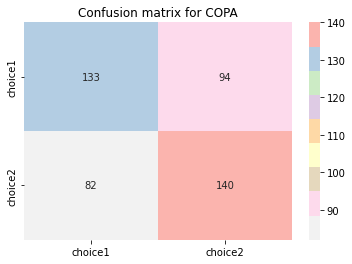

In [46]:
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.metrics import confusion_matrix

#plot heatmap of confusion matrix
mat = confusion_matrix(y_true, y_preds)
heatmap(mat, cmap="Pastel1_r", fmt="d", xticklabels=target_names, yticklabels=target_names, annot=True)

#add overall title to plot
plt.title('Confusion matrix for COPA', fontsize = 12) # title with fontsize 20

In [50]:
misclassified = [i for i in range(len(y_preds)) if ((y_preds[i] != y_true[i]) and (y_true[i]==0) and (y_preds[i]==1))]

In [51]:
misclassified_dataset = test_dataset.select(misclassified)

In [67]:
misclassified_dataset[2]

{'premise': 'दफ्तर बंद था।',
 'choice1': 'छुट्टी का दिन था।',
 'choice2': 'गर्मी का मौसम था।',
 'question': 'cause',
 'idx': 4,
 'label': 0}

In [97]:
model = AutoModelForMultipleChoice.from_pretrained("my_awesome_swag_model")